In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [210]:
# (1) Generate Summary Stats
data = pd.read_csv("diabetes.csv")
y = data.Outcome
data = data.drop("Outcome",axis = 1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [211]:
sumry = np.round(data.describe().transpose(),decimals=2)
print("Summary Statistics:\n",sumry.drop(['25%','50%','75%'],axis=1))

Summary Statistics:
                           count    mean     std    min     max
Pregnancies               768.0    3.85    3.37   0.00   17.00
Glucose                   768.0  120.89   31.97   0.00  199.00
BloodPressure             768.0   69.11   19.36   0.00  122.00
SkinThickness             768.0   20.54   15.95   0.00   99.00
Insulin                   768.0   79.80  115.24   0.00  846.00
BMI                       768.0   31.99    7.88   0.00   67.10
DiabetesPedigreeFunction  768.0    0.47    0.33   0.08    2.42
Age                       768.0   33.24   11.76  21.00   81.00


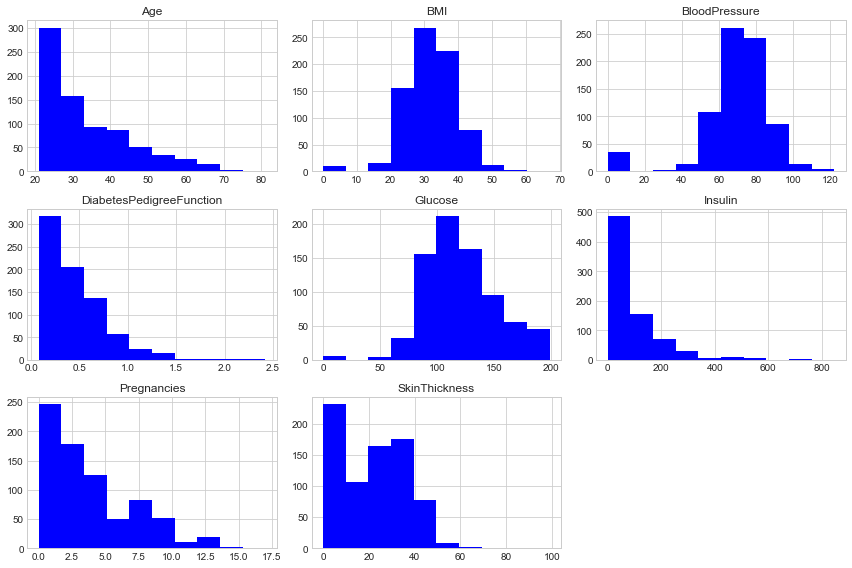

In [212]:
# (2) Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plot.tight_layout()
plot.show()


In [213]:
# (3) correlation matrices
colnames = list(data.columns.values)
corr_matrix = data.corr().values
corr_matrix = np.round(corr_matrix, decimals= 2)
corr_matrix = pd.DataFrame(corr_matrix,index=colnames,columns=colnames)  # convert back from np array into a pd dataframe

print(corr_matrix, '\n')

                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  
Pregnancies                 -0.07  0.02                     -0.03  0.54  
Glucose                      0.33  0.22                      0.14  0.26  
BloodPressure                0.09  0.28                  

In [214]:
# (4) Various Tests for PCA suitability
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data)
print(chi_square_value, p_value)

# p_value < 0.05
# CONCLUSION: REJECT THE NULL - Correlations EXISTS

956.1845305269898 1.2749976140864418e-183


In [215]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
print(kmo_all, kmo_model)
# kmo_model > 0.5)
# CONCLUSION: Sampling is Adequate
    

[0.56410666 0.55635992 0.69242236 0.56925315 0.56751276 0.65020654
 0.77231241 0.54716684] 0.5883561051209576


In [216]:
# (5) Tranform data
scaler = StandardScaler()
data_std = scaler.fit_transform(data) 
data_std[0:2]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

In [217]:
# (6) Run the PCA Method
n_components = 4
pca = PCA(n_components).fit(data_std)  # fit in standarized data


In [218]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

In [219]:
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
eigenvalues = pca.explained_variance_
print(pd.DataFrame(eigenvectors,index=colnames,columns=PCs),'\n')
print(eigenvalues)

                            PC1    PC2    PC3    PC4
Pregnancies               0.128  0.594 -0.013  0.081
Glucose                   0.393  0.174  0.468 -0.404
BloodPressure             0.360  0.184 -0.535  0.056
SkinThickness             0.440 -0.332 -0.238  0.038
Insulin                   0.435 -0.251  0.337 -0.350
BMI                       0.452 -0.101 -0.362  0.054
DiabetesPedigreeFunction  0.271 -0.122  0.433  0.834
Age                       0.198  0.621  0.075  0.071 

[2.09711056 1.73346726 1.03097228 0.87667054]


In [220]:
loadings= np.sqrt(eigenvalues)*eigenvectors
print(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs),'\n')

                             PC1     PC2     PC3     PC4
Pregnancies               0.1854  0.7821 -0.0132  0.0758
Glucose                   0.5691  0.2291  0.4752 -0.3783
BloodPressure             0.5213  0.2423 -0.5432  0.0524
SkinThickness             0.6372 -0.4371 -0.2417  0.0356
Insulin                   0.6299 -0.3305  0.3422 -0.3277
BMI                       0.6546 -0.1330 -0.3676  0.0506
DiabetesPedigreeFunction  0.3924 -0.1606  0.4397  0.7809
Age                       0.2867  0.8176  0.0762  0.0665 



In [221]:
expln_variance_ratio = np.round(pca.explained_variance_ratio_ * 100,decimals=2)  # 
eigval = -np.sort(-eigenvalues) #'-'=descending

npc = n_components # display
print("Eigenvalues                      :",np.round(eigval[0:npc],decimals=3))
print("Eigenvalues (%Explained_Variance):",expln_variance_ratio[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(expln_variance_ratio[0:npc]))

Eigenvalues                      : [2.097 1.733 1.031 0.877]
Eigenvalues (%Explained_Variance): [26.18 21.64 12.87 10.94]
Eigenvalues (%Cumulative)        : [26.18 47.82 60.69 71.63]


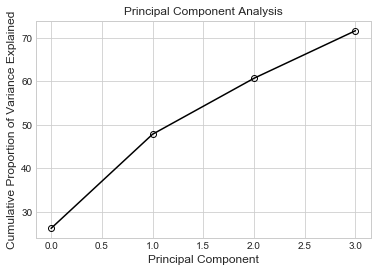

In [222]:
# pareto chart
plot.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(expln_variance_ratio)
plot.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plot.title('Principal Component Analysis',fontsize=12)
plot.xlabel("Principal Component",fontsize=12)
plot.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plot.show()

In [223]:
new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
print(new_reduced_dataset)

[[ 1.06850273  1.23489499  0.09592984  0.4969902 ]
 [-1.12168331 -0.73385167 -0.71293816  0.28505622]
 [-0.39647671  1.59587594  1.76067844 -0.07039464]
 ...
 [-0.28347525  0.09706503 -0.07719194 -0.68756106]
 [-1.06032431  0.83706234  0.42503045 -0.20449292]
 [-0.83989172 -1.15175485 -1.00917817  0.0869288 ]]


In [224]:
 #I am proving PC's are perpendicular to each other
    
test = new_reduced_dataset.transpose()
print(test[0].dot(test[2]))
print(test[0].dot(test[1]))
print(test[1].dot(test[2]))



2.646771690706373e-13
9.805489753489383e-13
-9.14823772291129e-14


### this shows the PC's are perpendicular to each other

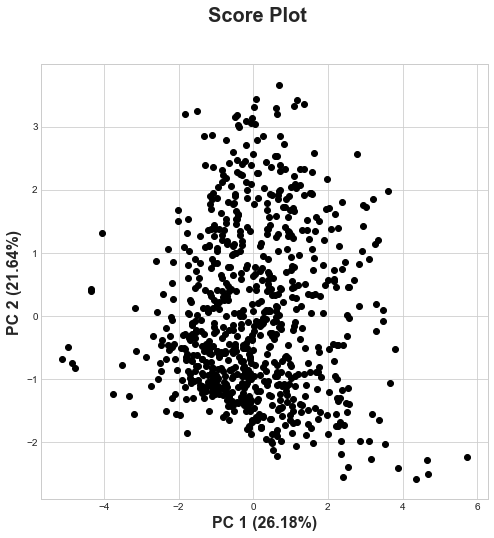

In [225]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plot.figure(figsize=(8,8))
fig.suptitle('Score Plot',fontsize=20,weight='bold')
plot.xlabel('PC 1 ('+str(expln_variance_ratio[0])+'%)',fontsize=16,weight='bold')
plot.ylabel('PC 2 ('+str(expln_variance_ratio[1])+'%)',fontsize=16,weight='bold')
plot.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
plot.show(); fig.savefig('ScorePlot.jpg')

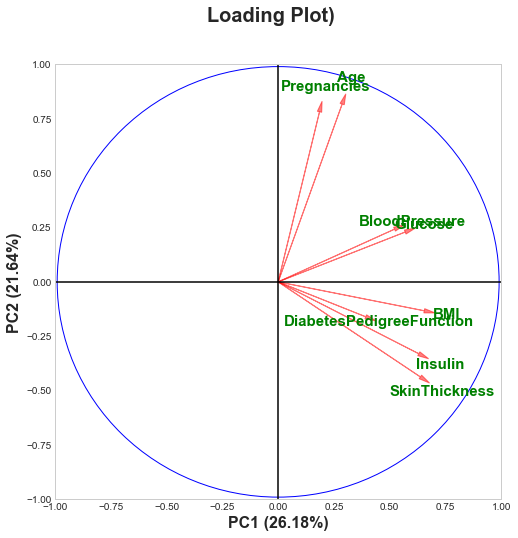

In [226]:
# Loadings Plot
p1=1; 
p2=2
coeff = loadings[:,p1-1:p2]
fig = plot.figure(figsize=(8,8))
plot.xlim(-1,1)
plot.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plot.xlabel('PC'+str(p1)+' ('+str(expln_variance_ratio[p1-1])+'%)',fontsize=16,weight='bold')
plot.ylabel('PC'+str(p2)+' ('+str(expln_variance_ratio[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plot.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plot.text(coeff[i,0]*1.15,coeff[i,1]*1.15,colnames[i],fontsize=15,
             color='g',ha='center',va='center',weight='bold')

circle = plot.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); 
ax.add_artist(circle)
plot.axhline(0, color='black'); 
plot.axvline(0, color='black')
plot.grid();
plot.show();
fig.savefig('Loadings.jpg')

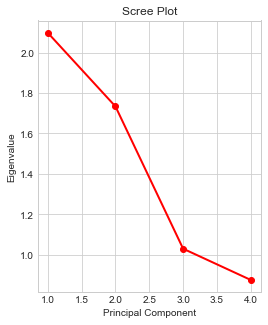

In [227]:
## scree plot, eigval from covar
num_vars= n_components
fig = plot.figure(figsize=(4,5))
sing_vals = np.arange(num_vars) + 1

plot.plot(sing_vals, eigval, 'ro-', linewidth=2)
plot.title('Scree Plot')
plot.xlabel('Principal Component')
plot.ylabel('Eigenvalue')
plot.show()

In [228]:
# compute the communilaties for the selected number of PC
no_pc =2
loadings_sq = loadings*loadings #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print("\n** Communalities for",no_pc,"PCs):")
print(pd.DataFrame(communality,index=colnames),'\n')


** Communalities for 2 PCs):
                                 0
Pregnancies               0.645989
Glucose                   0.376379
BloodPressure             0.330474
SkinThickness             0.597070
Insulin                   0.506036
BMI                       0.446131
DiabetesPedigreeFunction  0.179815
Age                       0.750711 



## Logistic Regression with reduced data


In [229]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(new_reduced_dataset,y,test_size=1/3,random_state=42, stratify=y)
logreg_new = LogisticRegression(C=0.01).fit(X_train_new, y_train_new)
print("Training set score: {:.3f}".format(logreg_new.score(X_train_new, y_train_new)))
print("Test set score: {:.3f}".format(logreg_new.score(X_test_new, y_test_new)))

# confusion matrix
 
y_pred_new = logreg_new.predict(X_test_new)
print(confusion_matrix(y_test_new, y_pred_new))  
print(classification_report(y_test_new, y_pred_new)) 
print("New Accuracy=", metrics.accuracy_score(y_test_new, y_pred_new))


Training set score: 0.732
Test set score: 0.707
[[148  19]
 [ 56  33]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       167
           1       0.63      0.37      0.47        89

    accuracy                           0.71       256
   macro avg       0.68      0.63      0.63       256
weighted avg       0.69      0.71      0.68       256

New Accuracy= 0.70703125


## Logistic Regression with original data


In [230]:
X_train_original,X_test_original,y_train_original,y_test_original = train_test_split(data,y,test_size=1/3,random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train_original)

X_train_original = scaler.transform(X_train_original)  
X_test_original = scaler.transform(X_test_original) 
logreg_original = LogisticRegression(C=0.01).fit(X_train_original, y_train_original)
print("Training set score: {:.3f}".format(logreg_original.score(X_train_original, y_train_original)))
print("Test set score: {:.3f}".format(logreg_original.score(X_test_original, y_test_original)))

# confusion matrix
 
y_pred_original = logreg_original.predict(X_test_original)
print(confusion_matrix(y_test_original, y_pred_original))  
print(classification_report(y_test_original, y_pred_original)) 
print("Original Accuracy=", metrics.accuracy_score(y_test_original, y_pred_original))

Training set score: 0.771
Test set score: 0.727
[[150  17]
 [ 53  36]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       167
           1       0.68      0.40      0.51        89

    accuracy                           0.73       256
   macro avg       0.71      0.65      0.66       256
weighted avg       0.72      0.73      0.71       256

Original Accuracy= 0.7265625


# ROC comparision

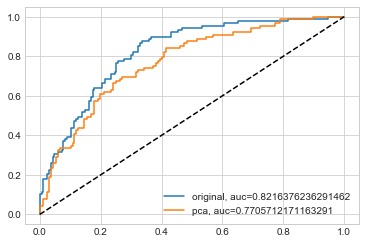

In [231]:



y_pred_proba_new = logreg_new.predict_proba(X_test_new)[::,1]
fpr_new, tpr_new, _ = metrics.roc_curve(y_test_new,  y_pred_proba_new)
auc_new = metrics.roc_auc_score(y_test_new, y_pred_proba_new)



y_pred_proba_original = logreg_original.predict_proba(X_test_original)[::,1]
fpr_original, tpr_original, _ = metrics.roc_curve(y_test_original,  y_pred_proba_original)
auc_original = metrics.roc_auc_score(y_test_original, y_pred_proba_original)

plot.plot(fpr_original,tpr_original,label="original, auc="+str(auc_original))
plot.plot(fpr_new,tpr_new,label="pca, auc="+str(auc_new))
plot.plot([0,1],[0,1],'k--')
plot.legend(loc=4)
plot.show()

## Not much difference.....

## KNN with reduced data

In [233]:

from sklearn.neighbors import KNeighborsClassifier
knn_new = KNeighborsClassifier(11)
knn_new.fit(X_train_new, y_train_new)
print("Training set score: {:.3f}".format(knn_new.score(X_train_new, y_train_new)))
print("Test set score: {:.3f}".format(knn_new.score(X_test_new, y_test_new)))

# confusion matrix
 
y_pred_new = knn_new.predict(X_test_new)
print(confusion_matrix(y_test_new, y_pred_new))  
print(classification_report(y_test_new, y_pred_new)) 
print("New Accuracy=", metrics.accuracy_score(y_test_new, y_pred_new))

Training set score: 0.785
Test set score: 0.719
[[139  28]
 [ 44  45]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       167
           1       0.62      0.51      0.56        89

    accuracy                           0.72       256
   macro avg       0.69      0.67      0.67       256
weighted avg       0.71      0.72      0.71       256

New Accuracy= 0.71875


## KNN with original data

In [234]:

knn_original = KNeighborsClassifier(11)
knn_original.fit(X_train_original, y_train_original)
print("Training set score: {:.3f}".format(knn_original.score(X_train_original, y_train_original)))
print("Test set score: {:.3f}".format(knn_original.score(X_test_original, y_test_original)))

# confusion matrix
 
y_pred_original = knn_original.predict(X_test_original)
print(confusion_matrix(y_test_original, y_pred_original))  
print(classification_report(y_test_original, y_pred_original)) 
print("Original Accuracy=", metrics.accuracy_score(y_test_original, y_pred_original))

Training set score: 0.781
Test set score: 0.762
[[145  22]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.69      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.72       256
weighted avg       0.76      0.76      0.75       256

Original Accuracy= 0.76171875


# ROC comparision

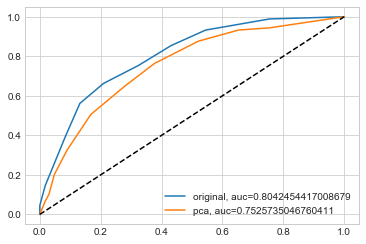

In [235]:
y_pred_proba_new = knn_new.predict_proba(X_test_new)[::,1]
fpr_new, tpr_new, _ = metrics.roc_curve(y_test_new,  y_pred_proba_new)
auc_new = metrics.roc_auc_score(y_test_new, y_pred_proba_new)



y_pred_proba_original = knn_original.predict_proba(X_test_original)[::,1]
fpr_original, tpr_original, _ = metrics.roc_curve(y_test_original,  y_pred_proba_original)
auc_original = metrics.roc_auc_score(y_test_original, y_pred_proba_original)

plot.plot(fpr_original,tpr_original,label="original, auc="+str(auc_original))
plot.plot(fpr_new,tpr_new,label="pca, auc="+str(auc_new))
plot.plot([0,1],[0,1],'k--')
plot.legend(loc=4)
plot.show()

## NB with reduced data

In [236]:
from sklearn.naive_bayes import GaussianNB
nb_new = GaussianNB()
nb_new.fit(X_train_new, y_train_new)
print("Training set score: {:.3f}".format(nb_new.score(X_train_new, y_train_new)))
print("Test set score: {:.3f}".format(nb_new.score(X_test_new, y_test_new)))

# confusion matrix
 
y_pred_new = nb_new.predict(X_test_new)
print(confusion_matrix(y_test_new, y_pred_new))  
print(classification_report(y_test_new, y_pred_new)) 
print("New Accuracy=", metrics.accuracy_score(y_test_new, y_pred_new))

Training set score: 0.738
Test set score: 0.719
[[141  26]
 [ 46  43]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       167
           1       0.62      0.48      0.54        89

    accuracy                           0.72       256
   macro avg       0.69      0.66      0.67       256
weighted avg       0.71      0.72      0.71       256

New Accuracy= 0.71875


## NB with oroginal data

In [237]:
nb_original = GaussianNB()
nb_original.fit(X_train_original, y_train_original)
print("Training set score: {:.3f}".format(nb_original.score(X_train_original, y_train_original)))
print("Test set score: {:.3f}".format(nb_original.score(X_test_original, y_test_original)))

# confusion matrix
 
y_pred_original = nb_original.predict(X_test_original)
print(confusion_matrix(y_test_original, y_pred_original))  
print(classification_report(y_test_original, y_pred_original)) 
print("Original Accuracy=", metrics.accuracy_score(y_test_original, y_pred_original))

Training set score: 0.779
Test set score: 0.738
[[132  35]
 [ 32  57]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       167
           1       0.62      0.64      0.63        89

    accuracy                           0.74       256
   macro avg       0.71      0.72      0.71       256
weighted avg       0.74      0.74      0.74       256

Original Accuracy= 0.73828125


# ROC comparision

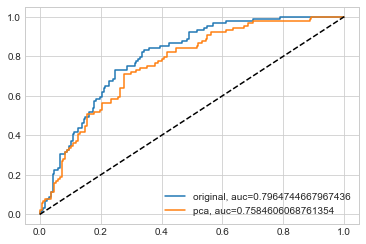

In [238]:
y_pred_proba_new = nb_new.predict_proba(X_test_new)[::,1]
fpr_new, tpr_new, _ = metrics.roc_curve(y_test_new,  y_pred_proba_new)
auc_new = metrics.roc_auc_score(y_test_new, y_pred_proba_new)



y_pred_proba_original = nb_original.predict_proba(X_test_original)[::,1]
fpr_original, tpr_original, _ = metrics.roc_curve(y_test_original,  y_pred_proba_original)
auc_original = metrics.roc_auc_score(y_test_original, y_pred_proba_original)

plot.plot(fpr_original,tpr_original,label="original, auc="+str(auc_original))
plot.plot(fpr_new,tpr_new,label="pca, auc="+str(auc_new))
plot.plot([0,1],[0,1],'k--')
plot.legend(loc=4)
plot.show()

## Conclusion:
### there is no significant down-performance for PCA, (at least for 4 components), the results are close to the case where we use original features for prediction
### tried to increase the components into 6, it gives slighly better result 
### Thus we should apply PCA since it gain us performance when there are large amount of data/features